## XgboostRegressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.shape

(1090, 9)

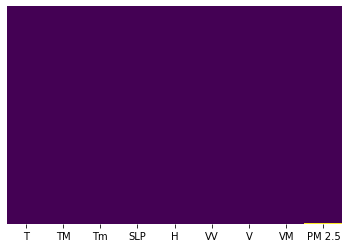

In [4]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1084,False,False,False,False,False,False,False,False
1085,False,False,False,False,False,False,False,False
1086,False,False,False,False,False,False,False,False
1087,False,False,False,False,False,False,False,False


In [8]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1084    False
1085    False
1086    False
1087    False
1088    False
Name: PM 2.5, Length: 1088, dtype: bool

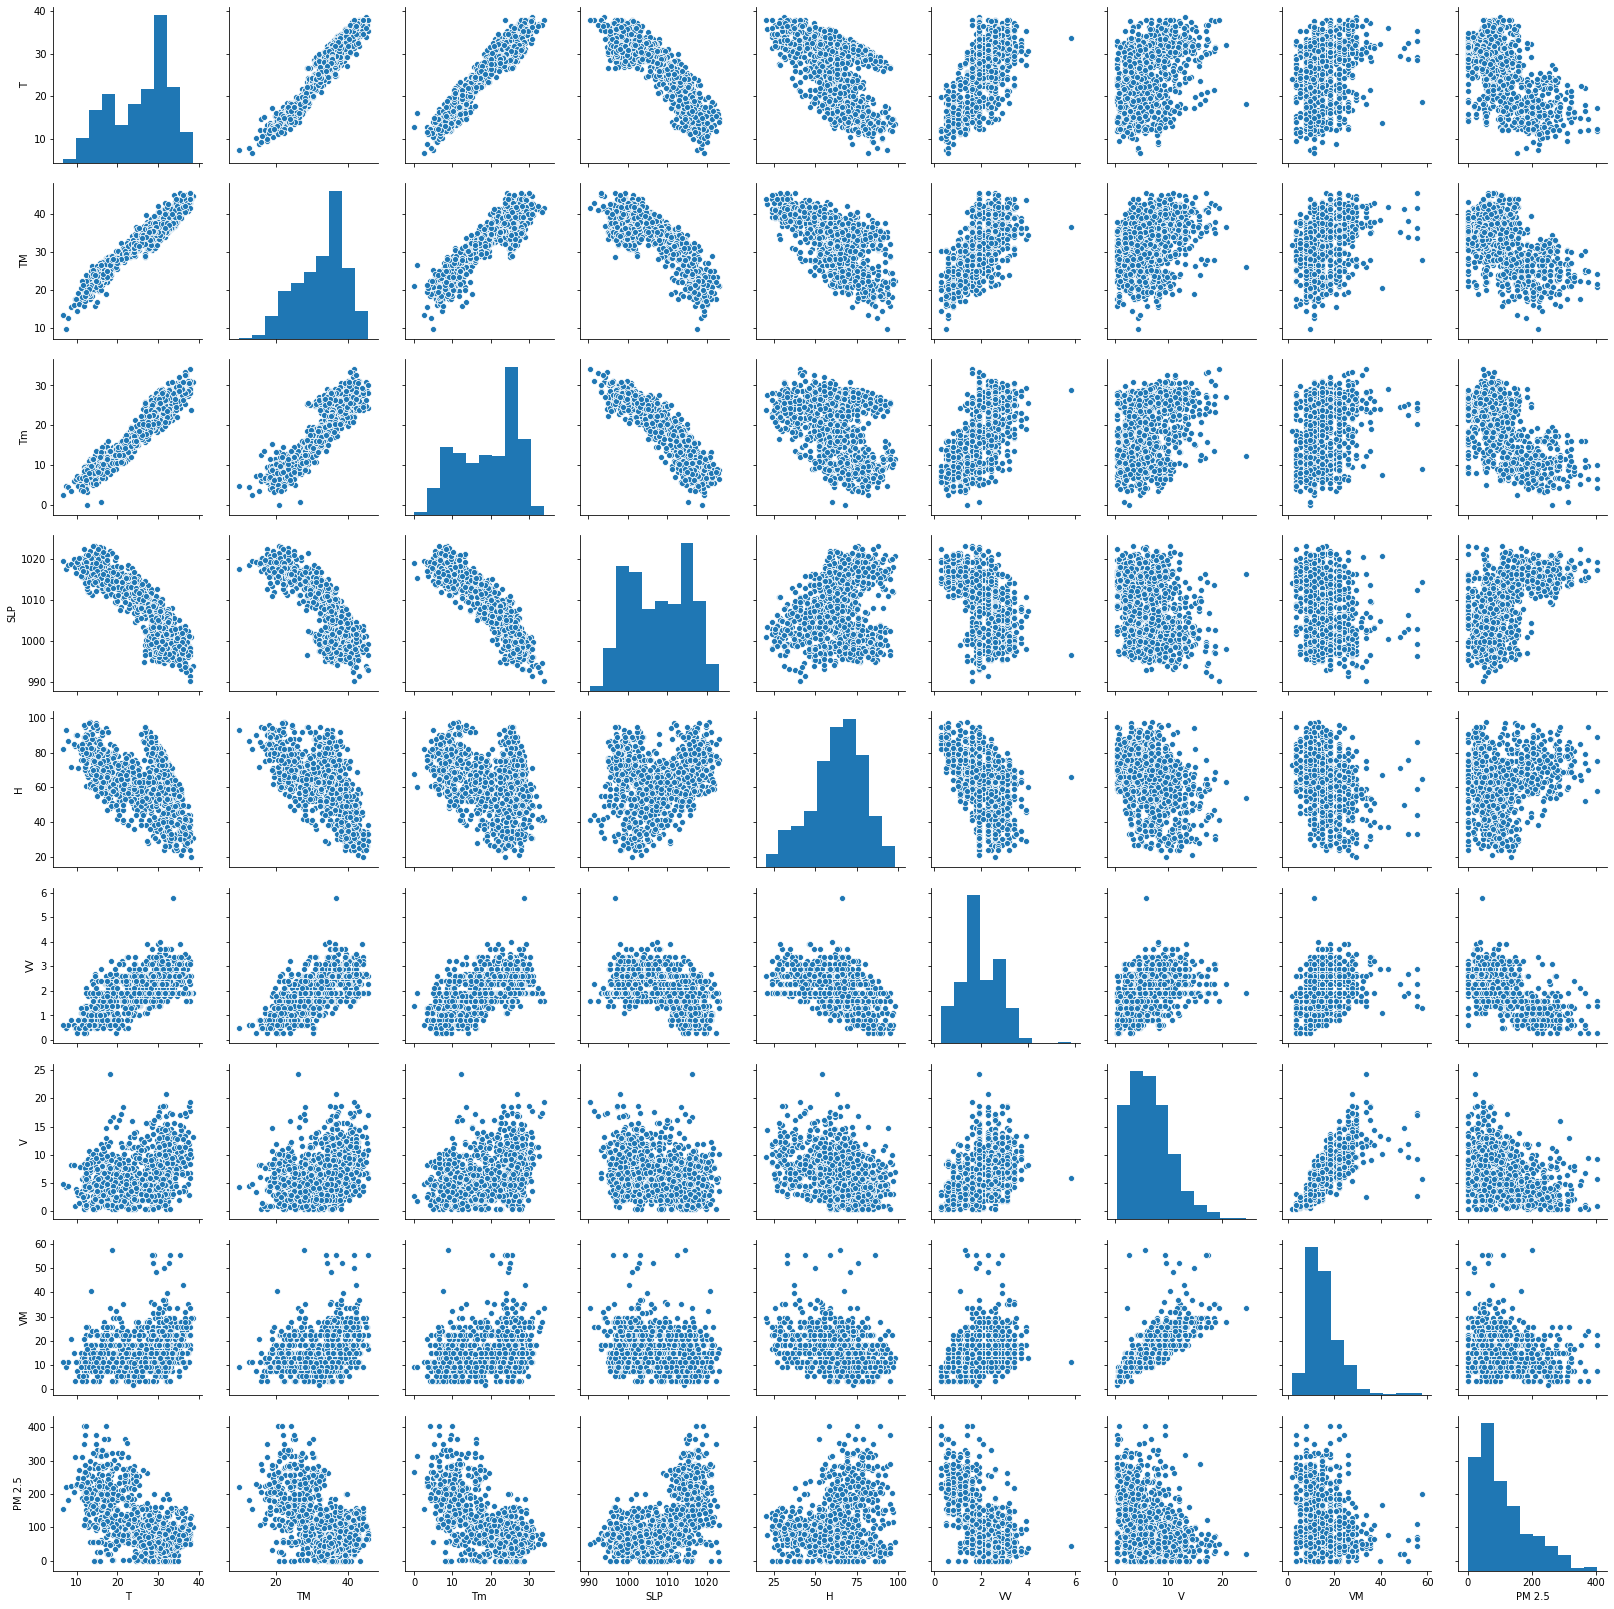

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963416,0.957227,-0.883207,-0.488919,0.625547,0.320218,0.276548,-0.629693
TM,0.963416,1.000000,0.889979,-0.826008,-0.576799,0.598727,0.303218,0.285671,-0.565459
Tm,0.957227,0.889979,1.000000,-0.912333,-0.275047,0.547490,0.312165,0.244408,-0.661733
SLP,-0.883207,-0.826008,-0.912333,1.000000,0.231971,-0.483494,-0.325862,-0.269129,0.605637
H,-0.488919,-0.576799,-0.275047,0.231971,1.000000,-0.489597,-0.356241,-0.368694,0.166577
VV,0.625547,0.598727,0.547490,-0.483494,-0.489597,1.000000,0.369851,0.325963,-0.593327
V,0.320218,0.303218,0.312165,-0.325862,-0.356241,0.369851,1.000000,0.780952,-0.327917
VM,0.276548,0.285671,0.244408,-0.269129,-0.368694,0.325963,0.780952,1.000000,-0.262848
PM 2.5,-0.629693,-0.565459,-0.661733,0.605637,0.166577,-0.593327,-0.327917,-0.262848,1.000000


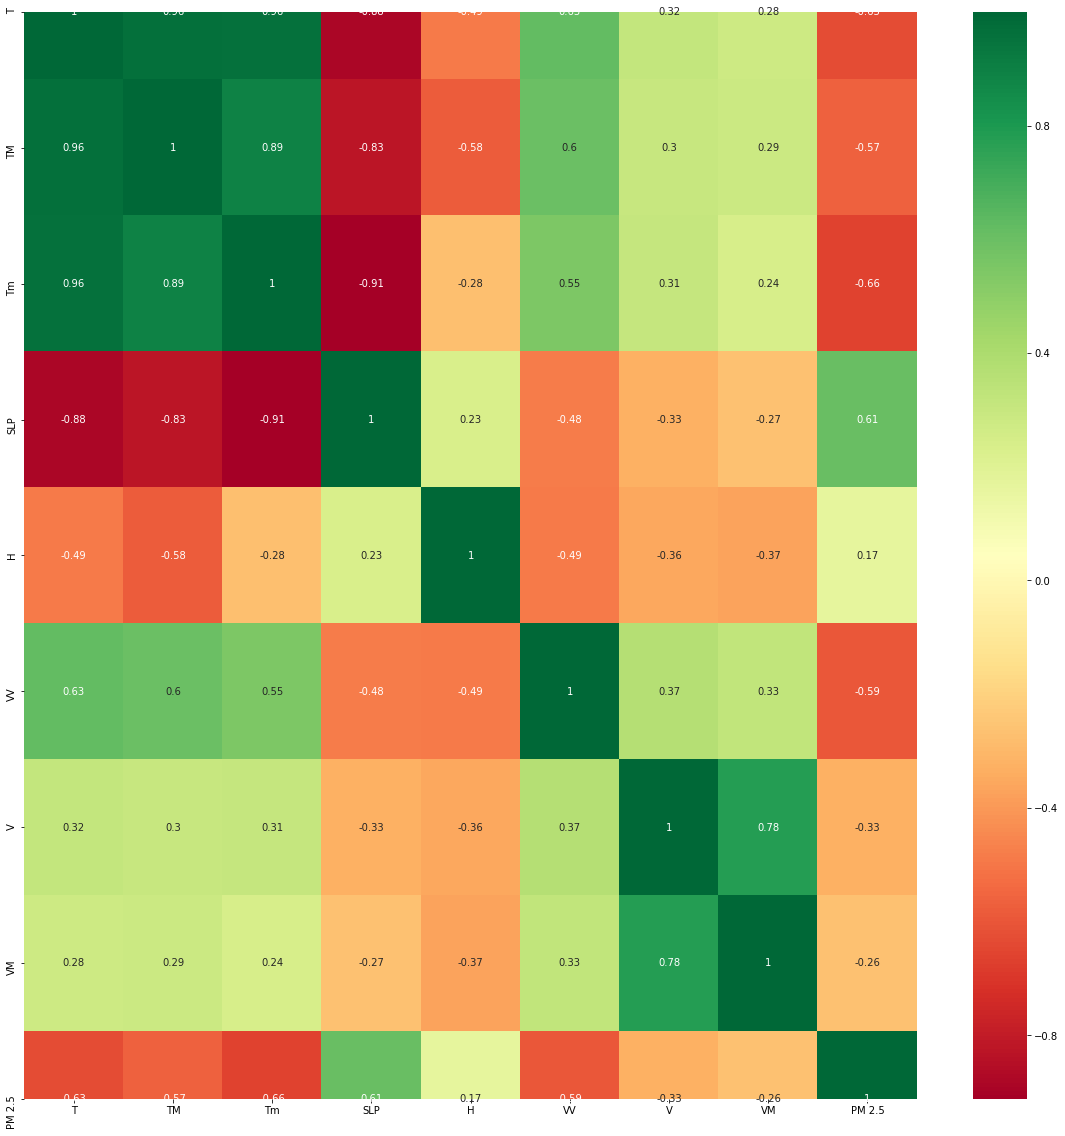

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [15]:
print(model.feature_importances_)

[0.19096455 0.09155011 0.24605534 0.06365883 0.07561991 0.22339204
 0.06202457 0.04673464]


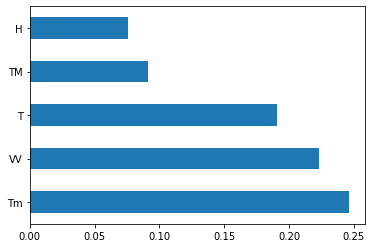

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

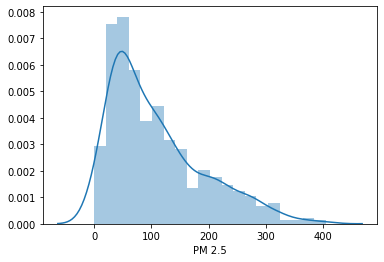

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [2]:
import xgboost as xgb
#conda install -c ananconda py-xgboost

In [3]:
xgb.__version__

'0.90'

In [22]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

[00:35:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.7847497264936635


In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5687642721360098


In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

[00:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [26]:
score.mean()

0.5188402954500952

#### Model Evaluation

In [27]:
prediction=regressor.predict(X_test)

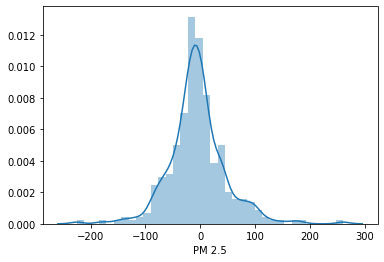

In [28]:
sns.distplot(y_test-prediction)

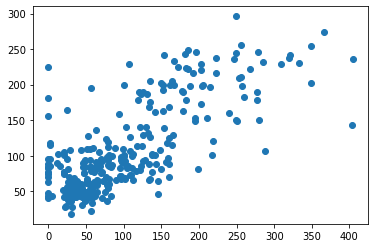

In [29]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [30]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [33]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [34]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [36]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[00:35:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.3s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[00:35:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[00:35:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[00:35:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[00:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[00:35:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.4s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[00:35:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.3s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[00:35:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[00:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.2s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[00:35:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   1.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[00:35:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[00:35:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[00:35:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[00:35:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1 
[00:35:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=30, learning_rate=0.1, total=   0.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:35:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:35:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:35:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:35:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:35:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.9s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:35:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:35:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:35:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:35:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:35:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.2s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[00:35:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[00:35:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[00:35:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[00:35:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3 
[00:35:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=500, min_child_weight=6, max_depth=5, learning_rate=0.3, total=   0.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:35:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:35:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   0.2s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:35:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:35:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:36:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:36:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:36:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[00:36:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[00:36:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[00:36:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[00:36:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[00:36:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[00:36:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[00:36:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[00:36:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[00:36:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[00:36:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.8s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[00:36:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[00:36:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[00:36:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[00:36:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3 
[00:36:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:36:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:36:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:36:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:36:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:36:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[00:36:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[00:36:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[00:36:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   2.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[00:36:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   1.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05 
[00:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=15, learning_rate=0.05, total=   2.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[00:36:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   2.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[00:36:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   2.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[00:36:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   2.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[00:36:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   2.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05 
[00:36:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=30, learning_rate=0.05, total=   2.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:36:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:36:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.1s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:36:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.4s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:36:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:36:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.0s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:36:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.7s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:36:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:36:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.4s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:36:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.4s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:36:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.6s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:36:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.1s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:36:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.3s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:37:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:37:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[00:37:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[00:37:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[00:37:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[00:37:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[00:37:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:37:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:37:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:37:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[00:37:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[00:37:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[00:37:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[00:37:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[00:37:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[00:37:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:37:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.1s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:37:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:37:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.2s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:37:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:37:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:37:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:37:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:37:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:37:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:37:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:37:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:37:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:37:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:37:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:37:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.6s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[00:37:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   2.1s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[00:37:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   2.0s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[00:37:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   2.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[00:37:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   2.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1 
[00:37:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=3, max_depth=30, learning_rate=0.1, total=   2.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[00:37:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[00:37:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[00:37:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[00:37:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5 
[00:37:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=4, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[00:37:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[00:37:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[00:37:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[00:37:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[00:37:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:37:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:37:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:37:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[00:37:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.0s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[00:37:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[00:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[00:37:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3 
[00:37:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=30, learning_rate=0.3, total=   1.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[00:37:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[00:37:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[00:37:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[00:37:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1 
[00:37:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:38:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:38:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:38:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[00:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[00:38:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[00:38:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[00:38:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6 
[00:38:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:38:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:38:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:38:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:38:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1 
[00:38:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=5, max_depth=10, learning_rate=0.1, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:38:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:38:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:38:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:38:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05 
[00:38:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=7, max_depth=30, learning_rate=0.05, total=   0.5s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[00:38:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[00:38:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[00:38:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[00:38:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1 
[00:38:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   1.0s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:38:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.2s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:38:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:38:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:38:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:38:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1000, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.9s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:38:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:38:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:38:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:38:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:38:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[00:38:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.3s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[00:38:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[00:38:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[00:38:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.1s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[00:38:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, total=   1.0s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:38:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:38:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:38:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[00:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[00:38:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[00:38:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[00:38:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6 
[00:38:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:38:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.2s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:38:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:38:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3 
[00:38:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[00:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[00:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[00:38:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[00:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 
[00:38:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, total=   0.8s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[00:38:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[00:38:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[00:38:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[00:38:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[00:38:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:38:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:38:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:38:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:39:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:39:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[00:39:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[00:39:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[00:39:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[00:39:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.2s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[00:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, total=   2.6s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:39:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:39:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:39:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:39:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2 
[00:39:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[00:39:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[00:39:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[00:39:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[00:39:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6 
[00:39:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=4, max_depth=10, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:39:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:39:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:39:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:39:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   2.4s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:39:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:39:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:39:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05 
[00:39:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:39:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:39:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:39:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.0s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:39:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:39:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:39:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.0s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[00:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[00:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[00:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[00:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[00:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[00:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[00:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[00:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[00:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05 
[00:40:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[00:40:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[00:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[00:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[00:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5 
[00:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   1.0s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3 
[00:40:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[00:40:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[00:40:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[00:40:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[00:40:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5 
[00:40:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:40:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:40:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:40:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1 
[00:40:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=6, max_depth=20, learning_rate=0.1, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[00:40:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[00:40:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[00:40:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[00:40:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3 
[00:40:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.6s
[CV] subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05 
[00:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[00:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[00:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[00:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[00:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[00:40:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[00:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[00:40:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.3s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[00:40:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[00:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[00:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2, total=   1.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[00:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   2.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[00:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   2.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[00:40:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   2.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[00:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   2.3s
[CV] subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05 
[00:40:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.05, total=   2.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:40:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.4s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:40:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:40:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   1.4s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[00:40:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[00:40:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[00:40:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[00:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6 
[00:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.6, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[00:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[00:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[00:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.1s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[00:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6 
[00:41:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=5, max_depth=30, learning_rate=0.6, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[00:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[00:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[00:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[00:41:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5 
[00:41:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=5, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[00:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[00:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[00:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[00:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[00:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[00:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[00:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[00:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[00:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[00:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.7s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:41:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.8s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:41:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.0s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   2.9s
[CV] subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05 
[00:41:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.1s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:41:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:41:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:41:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5 
[00:41:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[00:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[00:41:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[00:41:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[00:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2 
[00:41:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:41:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:41:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:41:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.8s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:41:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5 
[00:41:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=3, max_depth=25, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[00:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[00:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[00:41:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[00:41:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5 
[00:41:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=30, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[00:41:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[00:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[00:41:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[00:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6 
[00:41:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=25, learning_rate=0.6, total=   1.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05 
[00:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.2s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[00:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[00:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[00:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[00:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.6s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[00:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[00:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[00:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[00:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[00:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[00:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[00:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[00:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[00:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[00:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05 
[00:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=25, learning_rate=0.05, total=   0.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[00:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[00:41:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.9s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[00:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   1.0s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[00:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05 
[00:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:41:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   1.0s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:41:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   1.2s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:42:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   1.3s
[CV] subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:42:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   1.1s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:42:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:42:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:42:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   0.9s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[00:42:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[00:42:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[00:42:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[00:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05 
[00:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=400, min_child_weight=5, max_depth=30, learning_rate=0.05, total=   0.9s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[00:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[00:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[00:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[00:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1 
[00:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=10, learning_rate=0.1, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:42:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:42:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:42:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[00:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.9s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[00:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[00:42:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[00:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[00:42:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[00:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[00:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[00:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[00:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[00:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3 
[00:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[00:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[00:42:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[00:42:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[00:42:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5 
[00:42:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_weight=3, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[00:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[00:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[00:42:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[00:42:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5 
[00:42:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=900, min_child_weight=6, max_depth=5, learning_rate=0.5, total=   0.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6 
[00:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=100, min_child_weight=7, max_depth=5, learning_rate=0.6, total=   0.1s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[00:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[00:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[00:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[00:42:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2 
[00:42:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.2, total=   0.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:42:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:42:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:42:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.4s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1 
[00:42:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   2.4s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[00:42:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[00:42:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[00:42:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[00:42:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[00:42:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.6s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:42:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:42:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:42:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:42:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[00:42:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[00:42:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[00:42:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[00:42:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[00:42:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1 
[00:42:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=4, max_depth=10, learning_rate=0.1, total=   1.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.0s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:43:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   0.8s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:43:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.1s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:43:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.1s
[CV] subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5 
[00:43:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.5, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:43:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.8s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:43:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.9s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:43:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   2.0s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:43:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   2.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2 
[00:43:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=25, learning_rate=0.2, total=   1.7s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   2.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:43:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   2.2s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:43:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   2.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:43:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   2.3s
[CV] subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1 
[00:43:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_weight=4, max_depth=15, learning_rate=0.1, total=   2.1s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:43:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:43:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:43:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6 
[00:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_weight=3, max_depth=20, learning_rate=0.6, total=   0.4s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[00:43:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[00:43:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.3s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[00:43:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[00:43:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.2s
[CV] subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05 
[00:43:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_weight=3, max_depth=10, learning_rate=0.05, total=   1.2s
[00:43:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.1min finished
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Swapnil\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                             

In [38]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [39]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [40]:
xg_random.best_score_

-2867.922456588113

In [42]:
predictions=xg_random.predict(X_test)

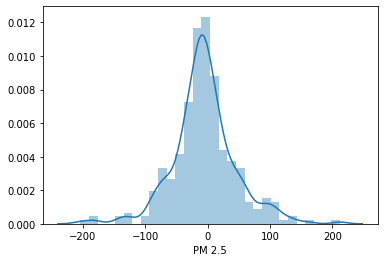

In [43]:
sns.distplot(y_test-predictions)

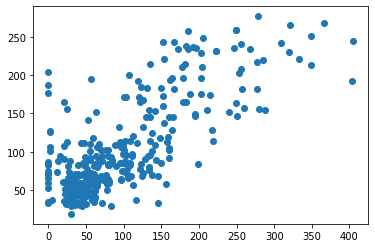

In [44]:
plt.scatter(y_test,predictions)

In [47]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 37.17556611740626
MSE: 2783.5322898153413
RMSE: 52.75919151972802


In [49]:
import pickle 

In [51]:
# open a file, where you ant to store the data
file = open('xg_boost_regression_model.pkl', 'wb')
# dump information to that file
pickle.dump(xg_random, file)